<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Machine-Learning-Modeling" data-toc-modified-id="Machine-Learning-Modeling-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Machine Learning Modeling<a id="5_Machine_Learning_Modeling"></a></a></span><ul class="toc-item"><li><span><a href="#Importing-Packages-and-Libraries" data-toc-modified-id="Importing-Packages-and-Libraries-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Importing Packages and Libraries<a id="5.1_Imports"></a></a></span></li><li><span><a href="#Loading-Data-Set" data-toc-modified-id="Loading-Data-Set-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Loading Data Set<a id="5.2_Loading_Data"></a></a></span></li><li><span><a href="#Scaling-the-Data" data-toc-modified-id="Scaling-the-Data-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Scaling the Data<a id="5.3_Scaling_Data"></a></a></span></li><li><span><a href="#Data-Splitting-into-Training-and-Testing-Set" data-toc-modified-id="Data-Splitting-into-Training-and-Testing-Set-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Data Splitting into Training and Testing Set<a id="5.4_Data_Splitting"></a></a></span></li><li><span><a href="#Model-Performance-Evaluation" data-toc-modified-id="Model-Performance-Evaluation-5.5"><span class="toc-item-num">5.5&nbsp;&nbsp;</span>Model Performance Evaluation<a id="5.5_Model_Performance_Evaluation"></a></a></span></li><li><span><a href="#Machine-Learning-without-Hyper-Parameter-Tuning" data-toc-modified-id="Machine-Learning-without-Hyper-Parameter-Tuning-5.6"><span class="toc-item-num">5.6&nbsp;&nbsp;</span>Machine Learning without Hyper-Parameter Tuning<a id="5.6_Machine_Learning_Modeling"></a></a></span><ul class="toc-item"><li><span><a href="#Random-Forest-Classifier" data-toc-modified-id="Random-Forest-Classifier-5.6.1"><span class="toc-item-num">5.6.1&nbsp;&nbsp;</span>Random Forest Classifier<a id="5.6.1_Random_Forest_Classifier"></a></a></span></li><li><span><a href="#Naive-Bayes-Classifier" data-toc-modified-id="Naive-Bayes-Classifier-5.6.2"><span class="toc-item-num">5.6.2&nbsp;&nbsp;</span>Naive Bayes Classifier<a id="5.6.2_Naive_Bayes_Classifier"></a></a></span></li><li><span><a href="#XGBoost-Classifier" data-toc-modified-id="XGBoost-Classifier-5.6.3"><span class="toc-item-num">5.6.3&nbsp;&nbsp;</span>XGBoost Classifier<a id="5.6.3_XGB_Classifier"></a></a></span></li></ul></li><li><span><a href="#XGBoost-with-Hyper-Parameter-Tuning" data-toc-modified-id="XGBoost-with-Hyper-Parameter-Tuning-5.7"><span class="toc-item-num">5.7&nbsp;&nbsp;</span>XGBoost with Hyper-Parameter Tuning<a id="5.7_xgboost_hyper-tuning"></a></a></span></li></ul></li></ul></div>

# Machine Learning Modeling<a id='5_Machine_Learning_Modeling'></a>

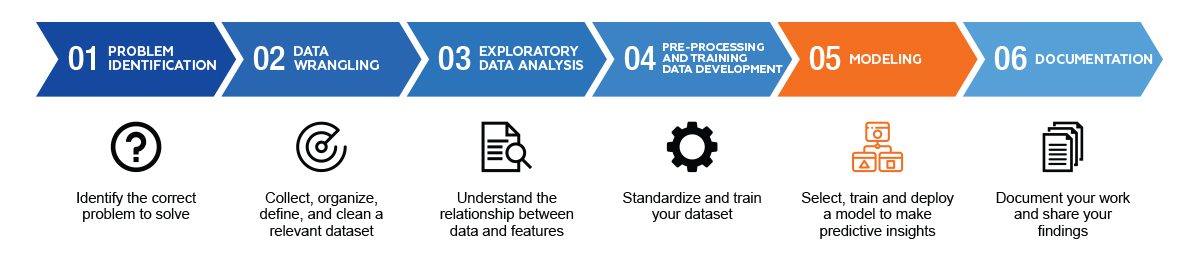

The focus of this notebook is on the machine learning steps which are shown below:

- **Step-1:** - Load/import prerequisites and required modules/libraries
- **Step-2:** - Import dataset and a quick check on the data quality
- **Step-3:** - Perform data splitting into X and y and define the model performance criteria
- **Step-4:** - Perform predictive modelling with various algorithms and carry out hyper-parameter tuning as required.
- **Step-5:** - Evaluate various results to confirm the final model for this project

The primary focus will be find the **best machine learning solution to predict fraud vs non-fraud** credit card transaction.

To access different phases of this project, please click at the below links to access notebooks:

   1. For **Problem Identification Notebook** - [click here]()
   2. For **Data Wrangling Notebook**, [click here]()
   3. For **Exploratory Data Analysis Notebook**, [click here]()

## Importing Packages and Libraries<a id='5.1_Imports'></a>

In [1]:
# Importing required packages and libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import average_precision_score, f1_score
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost.sklearn import XGBClassifier
from scipy.stats import zscore

%matplotlib inline
import warnings
warnings.simplefilter(action='ignore')

## Loading Data Set<a id='5.2_Loading_Data'></a>

In [2]:
# Loading data set
data = pd.read_csv('creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
# Checking data types
data.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

## Scaling the Data<a id='5.3_Scaling_Data'></a>

Since all the column features from V1 to V28 are already scaled as these are PCA features, I am going to scale only time and amount columns.

In [4]:
# Separating time and amount columns and then applying the zscore for scaling the data
df_balance = data.drop(['Time', 'Amount'], axis=1)
df_time_amount = data[['Time', 'Amount']]

# Applying the data scaling to df_time_amount
df_scaled_time_amount = df_time_amount.apply(zscore)
df_scaled = pd.DataFrame(df_scaled_time_amount)

In [5]:
# Combining the scaled data with the balance data
df = pd.concat([df_balance, df_scaled], axis=1)
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,Time,Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,-1.996583,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-1.996583,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,-1.996562,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,-1.996562,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-1.996541,-0.073403


## Data Splitting into Training and Testing Set<a id='5.4_Data_Splitting'></a>

In [6]:
# Splitting data into X and y and then into the training and testing set
X = df.drop('Class', axis=1)
y = df['Class']

# Splitting into the training and testing dataset of 70:30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=41)

## Model Performance Evaluation<a id='5.5_Model_Performance_Evaluation'></a>

Since the focus is on finding the frauds from the transactions, I am going to focus on the following:

- Use AUPRC (Area Under Precision Recall Curve) in place of conventional AUROC (Area Under Receiver Operating Characteristics (Source Credit - <a href="http://pages.cs.wisc.edu/~jdavis/davisgoadrichcamera2.pdf" target="_blank">The Relationship between Precision-Recall and ROC Curves</a>)
- The F1 score is the harmonic mean of the precision and recall. The highest possible value of an F-score is 1.0, indicating perfect precision and recall, and the lowest possible value is 0, if either the precision or the recall is zero (Source Credit - <a href="https://en.wikipedia.org/wiki/F-score" target="_blank">Wikipedia for F-score</a>)
- Since we want a system to focus more on identifyig the right frauds, the machine learning results need to be focused more on false positives and false negatives.

In [7]:
# Printing results of the machine learning classifier using this method
def model_result(clf,x_test,y_test):
    y_prob=clf.predict_proba(x_test)
    y_pred=clf.predict(x_test)
    print('AUPRC :', (average_precision_score(y_test, y_prob[:, 1])))
    print('F1-score :',(f1_score(y_test,y_pred)))
    print('Confusion_matrix: ')
    print(confusion_matrix(y_test,y_pred))
    print("accuracy_score")
    print(accuracy_score(y_test,y_pred))
    print("classification_report")
    print(classification_report(y_test,y_pred))

In [8]:
# Plotting the ROC curve
def plot_roc(clf,x_test,y_test):
    y_prob = clf.predict_proba(X_test)[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr,tpr)
    # plotting the roc curve
    plt.plot([0,1], [0,1], 'k--')
    plt.plot(fpr, tpr, label = 'AUC = %0.2f' % roc_auc)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(loc = 'lower right', prop={'size': 16})
    plt.xlim([-0.1,1.0])
    plt.ylim([-0.1,1.01])
    plt.show()

## Machine Learning without Hyper-Parameter Tuning<a id='5.6_Machine_Learning_Modeling'></a>

### Random Forest Classifier<a id='5.6.1_Random_Forest_Classifier'></a>

In [9]:
# Building Random Forest Classifier model
clf_rf = RandomForestClassifier(n_estimators=10)
clf_rf.fit(X_train, y_train)

print("Model Results of Random Forest with Test Data")
model_result(clf_rf, X_test, y_test)

Model Results of Random Forest with Test Data
AUPRC : 0.7347667320080524
F1-score : 0.7918367346938776
Confusion_matrix: 
[[85295     4]
 [   47    97]]
accuracy_score
0.999403110845827
classification_report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85299
           1       0.96      0.67      0.79       144

    accuracy                           1.00     85443
   macro avg       0.98      0.84      0.90     85443
weighted avg       1.00      1.00      1.00     85443



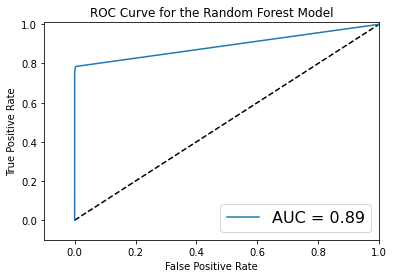

In [10]:
# Plotting ROC for the Random Forest Model
plt.title('ROC Curve for the Random Forest Model')
plot_roc(clf_rf,X_test,y_test)

### Naive Bayes Classifier<a id='5.6.2_Naive_Bayes_Classifier'></a>

In [11]:
# Building the Naive Bayes classifier
clf_nb = GaussianNB()
clf_nb.fit(X_train, y_train)

print("Model Results of Naive Bayes with Test Data")
model_result(clf_nb, X_test, y_test)

Model Results of Naive Bayes with Test Data
AUPRC : 0.07396381278462866
F1-score : 0.10674429888403687
Confusion_matrix: 
[[83492  1807]
 [   34   110]]
accuracy_score
0.9784534719052468
classification_report
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85299
           1       0.06      0.76      0.11       144

    accuracy                           0.98     85443
   macro avg       0.53      0.87      0.55     85443
weighted avg       1.00      0.98      0.99     85443



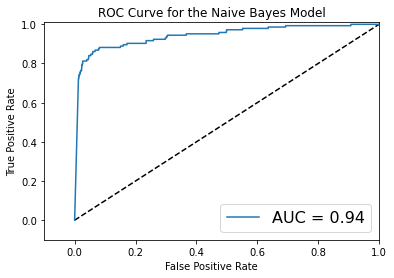

In [12]:
# Plotting ROC for the Random Forest Model
plt.title('ROC Curve for the Naive Bayes Model')
plot_roc(clf_nb,X_test,y_test)

### XGBoost Classifier<a id='5.6.3_XGB_Classifier'></a>

In [13]:
# Building the XGBoost classifier
clf_xg = XGBClassifier()
clf_xg.fit(X_train, y_train)

print("Model Results of XGBoost Machine with Test Data")
model_result(clf_xg, X_test, y_test)

[16:32:35] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Model Results of XGBoost Machine with Test Data
AUPRC : 0.7944648917500575
F1-score : 0.8326848249027237
Confusion_matrix: 
[[85293     6]
 [   37   107]]
accuracy_score
0.9994967405170698
classification_report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85299
           1       0.95      0.74      0.83       144

    accuracy                           1.00     85443
   macro avg       0.97      0.87      0.92     85443
weighted avg       1.00      1.00      1.00     85443



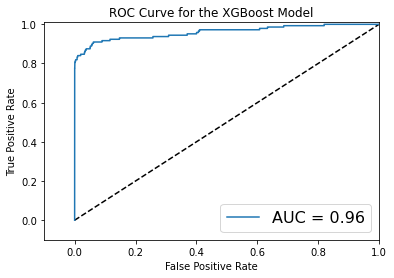

In [15]:
# Plotting ROC for the XGBoost Model
plt.title('ROC Curve for the XGBoost Model')
plot_roc(clf_xg,X_test,y_test)

Since AUC score is the best with XGBoost, I am going to focus on doing hyper-parameter tuning just for the XGBoost. 

## XGBoost with Hyper-Parameter Tuning<a id='5.7_xgboost_hyper-tuning'></a>

In [16]:
# Training the XGBoost model with the best parameters
param_grid = {n_estimators=[100,200,500,1000],
              colsample_bytree=[0.6,0.7,0.8,0.9],
              learning_rate=[0.1,0.01,0.05],
              max_depth=[2,3,4,5]
             }

xgb_model = XGBClassifier(objective= 'binary:logistic')
GridSearch_xgb = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, 
                              scoring='roc_auc', verbose=1, n_jobs=-1)

# Fitting the model
GridSearch_xgb.fit(X_train, y_train)

SyntaxError: invalid syntax (<ipython-input-16-16f1b14e3e64>, line 2)

Based on the above DSM methodology, a dedicated jupyter notebook was created to focus on one aspect at a time and you can refer these notebooks from the below links:

   1. For **Problem Identification Notebook** - [click here](https://github.com/jayguptacal/BankingAndInvestments/blob/main/CreditCardFraudDetection/1_Problem_Identification_CreditCard_Frauds.ipynb)
   2. For **Data Wrangling Notebook**, [click here](https://github.com/jayguptacal/BankingAndInvestments/blob/main/CreditCardFraudDetection/2_Data_Wrangling_CreditCard_Frauds.ipynb)
   3. For **Exploratory Data Analysis Notebook**, [click here](https://github.com/jayguptacal/BankingAndInvestments/blob/main/CreditCardFraudDetection/3_EDA_CreditCard_Frauds.ipynb)
   4. For **Pre-Processing and Training Data Development Notebook**, [click here](https://github.com/jayguptacal/BankingAndInvestments/blob/main/CreditCardFraudDetection/4_Preprocessing_CreditCard_Frauds.ipynb)
   5. For **Machine Learning Notebook**, [click here](https://github.com/jayguptacal/BankingAndInvestments/blob/main/CreditCardFraudDetection/5_MachineLearning_CreditCard_Frauds.ipynb)